In [27]:
from transformers import pipeline
import pandas as pd

In [28]:
import pandas as pd

sentences = [
    # Positive
    "Ich bin heute Morgen mit einem Lächeln aufgewacht.",
    "Die Sonne scheint, die Vögel zwitschern, und ich fühle mich großartig!",
    "Ich habe heute eine tolle Nachricht bekommen.",
    "Ich habe mich heute mit Freunden getroffen und viel gelacht.",
    "Ich habe heute etwas Neues gelernt, das mich begeistert.",
    "Ich habe heute ein leckeres Essen gekocht und es mit meiner Familie genossen.",
    "Ich habe heute ein gutes Buch gelesen, das mich gefesselt hat.",
    "Ich habe heute einen schönen Spaziergang in der Natur gemacht.",
    "Ich habe heute etwas Schönes für mich selbst getan.",
    "Ich bin heute einfach dankbar für alles, was ich habe.",
    # Very Positive
    "Ich hatte heute den besten Tag meines Lebens!",
    "Alles ist heute wie am Schnürchen gelaufen.",
    "Ich bin so glücklich, dass ich gar nicht aufhören kann zu lächeln.",
    "Ich fühle mich heute wie auf Wolke sieben.",
    "Ich könnte heute die ganze Welt umarmen.",
    "Ich bin so dankbar für all die positiven Dinge in meinem Leben.",
    "Ich weiß gar nicht, was ich getan habe, um so viel Glück zu haben.",
    "Ich genieße jeden Moment dieses wundervollen Tages.",
    "Ich kann es kaum erwarten, morgen aufzuwachen und den nächsten Tag zu erleben.",
    "Ich bin so positiv eingestellt, dass nichts mich runterziehen kann.",
    # Negative
    "Ich bin heute Morgen mit dem falschen Fuß aufgestanden.",
    "Alles scheint heute schief zu gehen.",
    "Ich habe heute eine schlechte Nachricht bekommen.",
    "Ich habe mich heute mit Freunden gestritten.",
    "Ich habe heute etwas verloren, das mir wichtig war.",
    "Ich habe heute ein schlechtes Essen gekocht, das mir nicht geschmeckt hat.",
    "Ich habe heute ein langweiliges Buch gelesen, das mich gelangweilt hat.",
    "Ich habe heute einen anstrengenden Tag bei der Arbeit gehabt.",
    "Ich habe heute etwas getan, das ich bereue.",
    "Ich bin heute einfach frustriert und enttäuscht.",
    # Very Negative
    "Ich hatte heute den schlimmsten Tag meines Lebens!",
    "Nichts ist heute wie geplant gelaufen.",
    "Ich bin so unglücklich, dass ich am liebsten weinen könnte.",
    "Ich fühle mich heute wie im Boden versunken.",
    "Ich könnte heute die ganze Welt zusammenreißen.",
    "Ich bin so wütend, dass ich mich kaum beherrschen kann.",
    "Ich weiß nicht, wie ich dieses Gefühl der Leere ertragen soll.",
    "Ich kann es kaum erwarten, dass dieser Tag endlich vorbei ist.",
    "Ich habe Angst vor morgen und davor, was es bringen wird.",
    "Ich fühle mich so allein und hilflos.",
    # Neutral
    "Mein Tag war heute ganz normal.",
    "Es ist nichts Besonderes passiert.",
    "Ich bin weder besonders glücklich noch besonders traurig.",
    "Ich bin einfach froh, dass ich gesund bin und ein Dach über dem Kopf habe.",
    "Ich mache mir heute keine Sorgen um die Zukunft.",
    "Ich genieße einfach den Moment.",
    "Ich bin dankbar für die kleinen Dinge im Leben.",
    "Ich weiß, dass es auch morgen wieder einen neuen Tag geben wird.",
    "Ich bin gespannt, was das Leben für mich bereithält.",
    "Ich bin bereit für alles, was kommt."
]

labels = ['positive'] * 10 + ['very positive'] * 10 + ['negative'] * 10 + ['very negative'] * 10 + ['neutral'] * 10

df = pd.DataFrame({'Sentence': sentences, 'Label': labels})

df


,Sentence,Label
0,Ich bin heute Morgen mit einem Lächeln aufgewa...,positive
1,"Die Sonne scheint, die Vögel zwitschern, und i...",positive
2,Ich habe heute eine tolle Nachricht bekommen.,positive
3,Ich habe mich heute mit Freunden getroffen und...,positive
4,"Ich habe heute etwas Neues gelernt, das mich b...",positive
5,Ich habe heute ein leckeres Essen gekocht und ...,positive
6,"Ich habe heute ein gutes Buch gelesen, das mic...",positive
7,Ich habe heute einen schönen Spaziergang in de...,positive
8,Ich habe heute etwas Schönes für mich selbst g...,positive
9,"Ich bin heute einfach dankbar für alles, was i...",positive


In [29]:
df = pd.DataFrame({'Sentence': sentences, 'Label': labels})

classifier = pipeline("zero-shot-classification", 
                      model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli", 
                      batch_size=8,
                      truncation=True)

def classify_sentiment(sequence):
    candidate_labels = ["very positive", "positive", "neutral", "negative", "very negative"]
    result = classifier(sequence, candidate_labels)
    return result['labels'][0] 

df['Sentiment'] = df['Sentence'].apply(classify_sentiment)

df

C:\Users\lmunz\PycharmProjects\test_stuff\.venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


,Sentence,Label,Sentiment
0,Ich bin heute Morgen mit einem Lächeln aufgewa...,positive,positive
1,"Die Sonne scheint, die Vögel zwitschern, und i...",positive,positive
2,Ich habe heute eine tolle Nachricht bekommen.,positive,very positive
3,Ich habe mich heute mit Freunden getroffen und...,positive,positive
4,"Ich habe heute etwas Neues gelernt, das mich b...",positive,positive
5,Ich habe heute ein leckeres Essen gekocht und ...,positive,positive
6,"Ich habe heute ein gutes Buch gelesen, das mic...",positive,positive
7,Ich habe heute einen schönen Spaziergang in de...,positive,positive
8,Ich habe heute etwas Schönes für mich selbst g...,positive,positive
9,"Ich bin heute einfach dankbar für alles, was i...",positive,very positive


In [30]:
matching_labels = df[df['Label'] == df['Sentiment']]
num_matching_labels = len(matching_labels)
accuracy = num_matching_labels / len(df) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 48.0 %


<Figure size 1000x600 with 0 Axes>

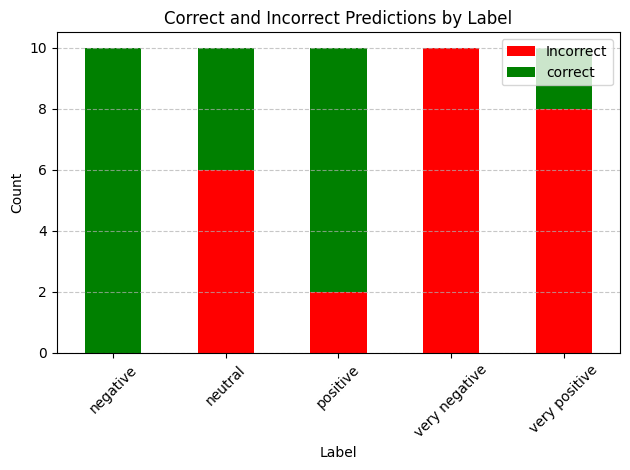

In [56]:
import matplotlib.pyplot as plt
label_correct_counts = df.groupby('Label')['Correct'].value_counts().unstack(fill_value=0)

# Plot
plt.figure(figsize=(10, 6))
label_correct_counts.plot(kind='bar', stacked=True, color=['red', 'green'])  # Farben getauscht
plt.title('Correct and Incorrect Predictions by Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Incorrect', 'correct'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [59]:
negative_df = df[df['Label'] == 'very negative']
negative_df

,Sentence,Label,Sentiment,Correct
30,Ich hatte heute den schlimmsten Tag meines Leb...,very negative,negative,False
31,Nichts ist heute wie geplant gelaufen.,very negative,neutral,False
32,"Ich bin so unglücklich, dass ich am liebsten w...",very negative,negative,False
33,Ich fühle mich heute wie im Boden versunken.,very negative,negative,False
34,Ich könnte heute die ganze Welt zusammenreißen.,very negative,positive,False
35,"Ich bin so wütend, dass ich mich kaum beherrsc...",very negative,negative,False
36,"Ich weiß nicht, wie ich dieses Gefühl der Leer...",very negative,negative,False
37,"Ich kann es kaum erwarten, dass dieser Tag end...",very negative,negative,False
38,"Ich habe Angst vor morgen und davor, was es br...",very negative,negative,False
39,Ich fühle mich so allein und hilflos.,very negative,neutral,False
